<a href="https://colab.research.google.com/github/Riva-Rodrigues/ML/blob/main/NeuralStyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.utils import save_image


# VGG Model
Lower layers (0, 5) capture basic features like edges and textures

Middle layers (10, 19) capture more complex patterns

Higher layers (28) capture high-level content

In [2]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.chosen_features = ["0", "5", "10", "19", "28"]
        self.model = models.vgg19(pretrained=True).features[:29]

    def forward(self, x):
        features = []
        for layer_num, layer in enumerate(self.model):
            x = layer(x)
            if str(layer_num) in self.chosen_features:
                features.append(x)
        return features


In [3]:
def load_image(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device)


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
imsize = 356

loader = transforms.Compose(
    [
        transforms.Resize((imsize, imsize)),
        transforms.ToTensor(),
    ]
)


In [5]:
original_img = load_image("og.jpeg")
style_img = load_image("style.jpeg")

generated = original_img.clone().requires_grad_(True)


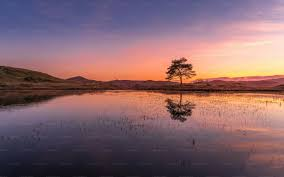

In [13]:

from IPython.display import Image
Image('og.jpeg')




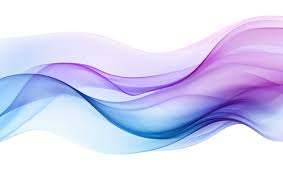

In [12]:
from IPython.display import Image
Image('style.jpeg')


In [6]:
model = VGG().to(device).eval()

total_steps = 6000
learning_rate = 0.001
alpha = 1
beta = 0.01
optimizer = optim.Adam([generated], lr=learning_rate)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:04<00:00, 116MB/s]


In [7]:
for step in range(total_steps):
    # Extract features
    generated_features = model(generated)
    original_img_features = model(original_img)
    style_features = model(style_img)

    style_loss = original_loss = 0

    # Calculate content and style losses
    for gen_feature, orig_feature, style_feature in zip(
        generated_features, original_img_features, style_features
    ):
        batch_size, channel, height, width = gen_feature.shape

        # Content loss - Mean Squared Error between feature maps
        original_loss += torch.mean((gen_feature - orig_feature) ** 2)

        # Style loss - Mean Squared Error between Gram matrices
        G = gen_feature.view(channel, height * width).mm(
            gen_feature.view(channel, height * width).t()
        )
        A = style_feature.view(channel, height * width).mm(
            style_feature.view(channel, height * width).t()
        )
        style_loss += torch.mean((G - A) ** 2)

    # Combined loss
    total_loss = alpha * original_loss + beta * style_loss

    # Backpropagation
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # Save progress
    if step % 10 == 0:
        print(total_loss)
        save_image(generated, "generated.png")


tensor(101051.1484, device='cuda:0', grad_fn=<AddBackward0>)
tensor(83304.4219, device='cuda:0', grad_fn=<AddBackward0>)
tensor(73082.5234, device='cuda:0', grad_fn=<AddBackward0>)
tensor(66041.2734, device='cuda:0', grad_fn=<AddBackward0>)
tensor(60634.0703, device='cuda:0', grad_fn=<AddBackward0>)
tensor(56070.2266, device='cuda:0', grad_fn=<AddBackward0>)
tensor(52097.5508, device='cuda:0', grad_fn=<AddBackward0>)
tensor(48594.5703, device='cuda:0', grad_fn=<AddBackward0>)
tensor(45486.3125, device='cuda:0', grad_fn=<AddBackward0>)
tensor(42730.2539, device='cuda:0', grad_fn=<AddBackward0>)
tensor(40292.9297, device='cuda:0', grad_fn=<AddBackward0>)
tensor(38149.5859, device='cuda:0', grad_fn=<AddBackward0>)
tensor(36276.1523, device='cuda:0', grad_fn=<AddBackward0>)
tensor(34646.2344, device='cuda:0', grad_fn=<AddBackward0>)
tensor(33236.3672, device='cuda:0', grad_fn=<AddBackward0>)
tensor(32022.5859, device='cuda:0', grad_fn=<AddBackward0>)
tensor(30980.1680, device='cuda:0', gra

In [8]:
G = gen_feature.view(channel, height * width).mm(
    gen_feature.view(channel, height * width).t()
)


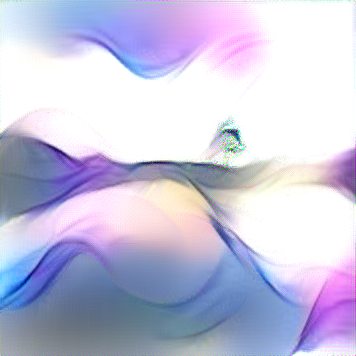

In [9]:
# prompt: display the generated.png

from IPython.display import Image
Image('generated.png')
